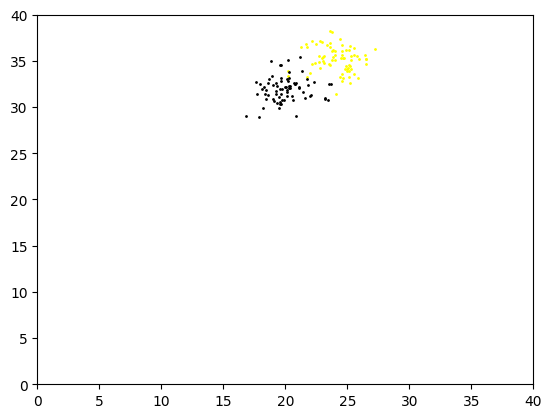

Sample with (25.0, 32.0) classified as Pikachu
Sample with (24.2, 31.5) classified as Pikachu
Sample with (22.0, 34.0) classified as Pikachu
Sample with (20.5, 34.0) classified as Pichu
User sample (22.0, 22.0) classified as Pichu due to the nearest Pokémon being a Pichu.
User sample (22.0, 22.0) classified as Pichu since the 10 nearest Pokémon are a majority of Pichu.
There were 0 Pikachu's and 10 Pichu's among the nearest ten Pokémon.
Model accuracy: 92.00%
Model accuracy: 94.00%
Model accuracy: 94.00%
Model accuracy: 92.00%
Model accuracy: 96.00%
Model accuracy: 94.00%
Model accuracy: 98.00%
Model accuracy: 94.00%
Model accuracy: 98.00%
Model accuracy: 98.00%
The mean accuracy of the model is: 95.00%


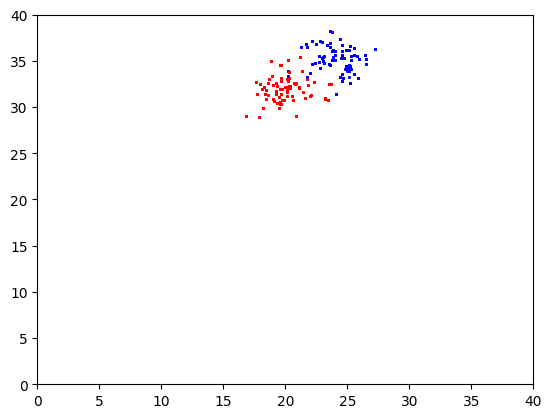

In [44]:
import re
import matplotlib.pyplot as plt
import numpy as np

datapoints_path = "./datapoints.txt"  
testpoints_path = "./testpoints.txt"  


test_points = []

list_of_pikachus = []
list_of_pichus = []

pikachu_count = 0
pichu_count = 0



with open(datapoints_path, "r") as f_read:
    for line in f_read:
        line = line.strip() 
        line = re.sub(r"[()]", "", line)
       
    #   This divides each line into parts to isolate each variable. It also cleans up each part then adds them to an array of parts.
        parts = [part.strip() for part in line.split(",")]
        
        # This checks if each line has 3 parts, and if it does, sorts them into the correct part-type.
        if len(parts) == 3:
            width, height, label = parts
            # The code below adds the parts to the either the list of pikachus or the list of pichus as as dictionary with floats or ints depending on what fits best. 
            # It also labels each of the parts in the dictionary as key/value pairs so that we can more easily reference them later on.
            try:
                data_point = {
                    "width": float(width),
                    "height": float(height),
                    "label": int(label)
                }

                if data_point["label"] == 1:
                    list_of_pikachus.append(data_point)
                else:
                    list_of_pichus.append(data_point)
            except ValueError:
                # If there is anything wrong with any of the values we attempt to catch it here and stop it from being added to the cleaned data
                print(f"This line has one or more values that are faulty: {line}")  

# Adding this comment as a reminder to myself - 
# to refer to a specific value in a dictionary you can type "dictionary['key']" like so to find it  
# for data_point in list_of_pikachus:
#    print(f"Width: {data_point['width']}, Height: {data_point['height']}, Label: {data_point['label']}")



plt.axis((0, 40, 0, 40))    

for data_point in list_of_pikachus:
    plt.scatter(data_point['width'], data_point['height'], color='yellow', label='Pikachu', s=1)
for data_point in list_of_pichus:
    plt.scatter(data_point['width'], data_point['height'], color='black', label='Pichu', s=1)

plt.show()
        




with open(testpoints_path, "r") as f_read:
    for line in f_read:
        line = line.strip()
        # The regex is meant to remove the first number and period from the test points.
        # It starts at the beginning, then checks for one or more digits, then finds the period and any whitespace after it.
        # It then removes or substitues these with nothing so that we are left with the width and height values only.
        line = re.sub(r"^\d+\.\s*", "", line)
        line = re.sub(r"[()]", "", line)
        if ", " in line:
            try:
                x, y = line.split(", ")
                test_points.append((float(x), float(y)))
            except ValueError:
                print(f"This line has one or more values that are faulty: {line}")  


def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


def find_closest_pokemon(x, y, pikachu_list, pichu_list):
    # The float('inf') line below is very useful here - it sets the closest_distance variable to infinite.
    # Since any finite number will always be lower than infinity, we don't have to set a specific starting value for
    # closest_distance, which in our case allows the user to enter positive numbers of any size.
    # This also means that the hypothetical Pikachu's of our project can be galaxy-sized, which is funny.

    closest_distance = float('inf')
    closest_pokemon = ""
    
    for pikachu in pikachu_list:
        distance = euclidean_distance(x, y, pikachu['width'], pikachu['height'])
        if distance < closest_distance:
            closest_distance = distance
            closest_pokemon = "Pikachu"

    for pichu in pichu_list:
        distance = euclidean_distance(x, y, pichu['width'], pichu['height'])
        if distance < closest_distance:
            closest_distance = distance
            closest_pokemon = "Pichu"
    if(closest_distance > 100):
        print("That is one giant Pikachu you've got there, buddy! Want to trade my Butterfree for it?")

    return closest_pokemon

def ten_closest_pokemon(x, y):
    closest_pokemon = []

    for pikachu in list_of_pikachus:
        distance = euclidean_distance(x, y, pikachu['width'], pikachu['height'])
        closest_pokemon.append({"label": pikachu["label"], "distance": distance})

    for pichu in list_of_pichus:
        distance = euclidean_distance(x, y, pichu['width'], pichu['height'])
        closest_pokemon.append({"label": pichu["label"], "distance": distance})

    # The "key=lambda distance: distance['distance']" line below is an anonymous function that finds the distance in each dict
    # and then allows the sorted-method to sort in ascending order based on those values 
    sorted_nearest_pokemon = sorted(closest_pokemon, key=lambda d: d['distance'])
    nearest_ten = sorted_nearest_pokemon[:10]

    # The two counts below each gain 1 "point" for each label in the nearest_ten list that represents their Pokémon
    pikachu_count = sum(1 for pokémon in nearest_ten if pokémon["label"] == 1)
    pichu_count = sum(1 for pokémon in nearest_ten if pokémon["label"] == 0)

    if pikachu_count > pichu_count:
        return "Pikachu", pikachu_count, pichu_count
    elif pichu_count > pikachu_count:
        return "Pichu", pikachu_count, pichu_count
    else:
        # In the case of a tie the code assigns the label based on the closest Pokémon
        return "Pikachu" if nearest_ten[0]["label"] == 1 else "Pichu", pikachu_count, pichu_count


for test_point in test_points:
    x, y = test_point
    closest_point_classification = find_closest_pokemon(x, y, list_of_pikachus, list_of_pichus)
    print(f"Sample with ({x}, {y}) classified as {closest_point_classification}")


while True: 
    try:
        user_input = input("Please enter width and height with positive numbers: ")
        user_x, user_y = map(float, user_input.split())
        
        if user_x <= 0 or user_y <= 0:
            raise ValueError("Please enter positive numbers.")
        
        closest_point_classification = find_closest_pokemon(x, y, list_of_pikachus, list_of_pichus)
        majority_classification, pikachu_count, pichu_count = ten_closest_pokemon(user_x, user_y)
        
        
        print(f"User sample ({user_x}, {user_y}) classified as {closest_point_classification} due to the nearest Pokémon being a {closest_point_classification}.")
        print(f"User sample ({user_x}, {user_y}) classified as {majority_classification} since the 10 nearest Pokémon are a majority of {majority_classification}.")
        print(f"There were {pikachu_count} Pikachu's and {pichu_count} Pichu's among the nearest ten Pokémon.")

        break   
    except ValueError:
        print(f"You entered {user_input}, which does not contain two separate positive numbers.")
        print("Please enter two valid positive numbers separated by a space.")



i = 0
accuracy_list = []

while i < 10:

    np.random.shuffle(list_of_pikachus)
    np.random.shuffle(list_of_pichus)

    randomly_selected_pikachus = list_of_pikachus[:50]
    randomly_selected_pichus = list_of_pichus[:50]

    for pikachu in randomly_selected_pikachus:
        plt.scatter(pikachu['width'], pikachu['height'], color='blue', label='Pikachu', s=1)   

    for pichu in randomly_selected_pichus:
        plt.scatter(pichu['width'], pichu['height'], color='red', label='Pichu', s=1)   

    remaining_pikachus = list_of_pikachus[50:]
    remaining_pichus = list_of_pichus[50:]

    new_test_data = remaining_pichus + remaining_pikachus
    np.random.shuffle(new_test_data)

    plt.axis((0, 40, 0, 40))    

    # plt.show()

    for test_point in new_test_data:
        x = float(test_point['width'])
        y = float(test_point['height'])
        
        closest_point_classification = find_closest_pokemon(x, y, randomly_selected_pikachus, randomly_selected_pichus)
        majority_classification, pikachu_count, pichu_count = ten_closest_pokemon(x, y)
        
        # print(f"Sample with ({x}, {y}) classified as {closest_point_classification}")
        # print(f"Majority classification: {majority_classification}, Pikachu count: {pikachu_count}, Pichu count: {pichu_count}")


    def calculate_accuracy(test_data):
        correct_predictions = 0
        
        for test_point in test_data:
            x, y = float(test_point['width']), float(test_point['height'])
            true_label = test_point["label"]
            
            prediction = find_closest_pokemon(x, y, randomly_selected_pikachus, randomly_selected_pichus)
            if(prediction == "Pikachu"):
                predicted_label = 1
            else:
                predicted_label = 0    
            
            if predicted_label == true_label:
                correct_predictions += 1
        
        accuracy = correct_predictions / len(test_data)
        return accuracy

    accuracy = calculate_accuracy(new_test_data)
    accuracy_list.append(accuracy)
    print(f"Model accuracy: {accuracy * 100:.2f}%")
    i += 1



def mean_accuracy(accuracy_list): 
    return (sum(accuracy_list) / len(accuracy_list)) * 100 

print(f"The mean accuracy of the model is: {mean_accuracy(accuracy_list):.2f}%")

    

    
      

    
        

